<a href="https://colab.research.google.com/github/JayasreeThyadi/Co_War/blob/main/Covid19_india.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uplo = files.upload()

Saving covid_19_india.csv to covid_19_india.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
from pylab import *


In [ ]:
df = pd.read_csv("covid_19_india.csv")

In [ ]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       16382 non-null  int64 
 1   Date                      16382 non-null  object
 2   Time                      16382 non-null  object
 3   State/UnionTerritory      16382 non-null  object
 4   ConfirmedIndianNational   16382 non-null  object
 5   ConfirmedForeignNational  16382 non-null  object
 6   Cured                     16382 non-null  int64 
 7   Deaths                    16382 non-null  int64 
 8   Confirmed                 16382 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,16382.00000,1.638200e+04,16382.000000,1.638200e+04
mean,8191.50000,2.193850e+05,3268.012392,2.416177e+05
std,4729.22039,4.829092e+05,8689.017569,5.294055e+05
min,1.00000,0.000000e+00,0.000000,0.000000e+00
25%,4096.25000,2.375000e+03,19.000000,3.406000e+03
50%,8191.50000,2.686350e+04,401.500000,3.197650e+04
75%,12286.75000,2.413510e+05,2907.500000,2.600305e+05
max,16382.00000,5.753290e+06,119303.000000,5.997587e+06


Dropping unneccesary data


In [ ]:
df = df.drop(['ConfirmedForeignNational','ConfirmedIndianNational'],axis=1)

Ratio of Cured to Deaths

In [ ]:
df["Cured:Deaths"]=df['Cured']/df['Deaths']
df.loc[:,"Cured:Deaths"]

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
16377    165.822123
16378     89.360606
16379     46.573571
16380     75.160638
16381     82.833190
Name: Cured:Deaths, Length: 16382, dtype: float64

Mean of Confirmed, Cured and Deaths


In [ ]:
print("The mean of confirmed cases: ",df['Confirmed'].mean())
print("The mean of cured cases: ",df['Cured'].mean())
print("The mean of deaths: ",df['Deaths'].mean())

The mean of confirmed cases:  241617.7341594433
The mean of cured cases:  219384.98852398974
The mean of deaths:  3268.0123916493712


Mean confirmed cases of each state

In [ ]:
df.groupby('State/UnionTerritory').mean()['Confirmed']

State/UnionTerritory
Andaman and Nicobar Islands                 3.460961e+03
Andhra Pradesh                              6.374246e+05
Arunachal Pradesh                           1.145331e+04
Assam                                       1.640238e+05
Bihar                                       2.128772e+05
Bihar****                                   7.154545e+05
Cases being reassigned to states            5.759417e+03
Chandigarh                                  1.704141e+04
Chhattisgarh                                2.501608e+05
Dadra and Nagar Haveli                      1.036100e+04
Dadra and Nagar Haveli and Daman and Diu    3.461620e+03
Daman & Diu                                 2.000000e+00
Delhi                                       4.548519e+05
Goa                                         4.410859e+04
Gujarat                                     2.247885e+05
Haryana                                     2.038005e+05
Himachal Pradesh                            4.430538e+04
Jammu and 

In [ ]:
df.groupby('State/UnionTerritory').mean()['Cured']

State/UnionTerritory
Andaman and Nicobar Islands                 3.278678e+03
Andhra Pradesh                              5.948058e+05
Arunachal Pradesh                           1.053956e+04
Assam                                       1.506815e+05
Bihar                                       1.984631e+05
Bihar****                                   7.012340e+05
Cases being reassigned to states            0.000000e+00
Chandigarh                                  1.553212e+04
Chhattisgarh                                2.256778e+05
Dadra and Nagar Haveli                      1.017600e+04
Dadra and Nagar Haveli and Daman and Diu    3.231022e+03
Daman & Diu                                 0.000000e+00
Delhi                                       4.286681e+05
Goa                                         3.975236e+04
Gujarat                                     2.022973e+05
Haryana                                     1.886196e+05
Himachal Pradesh                            3.931019e+04
Jammu and 

(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500.]), <a list of 9 Text major ticklabel objects>)

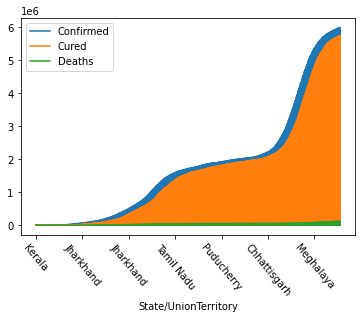

In [ ]:
df.plot(x='State/UnionTerritory',y=['Confirmed','Cured','Deaths'],kind='line')
plt.xticks(rotation=-50)

Correlation between all the fields

In [ ]:
cor = df.corr()

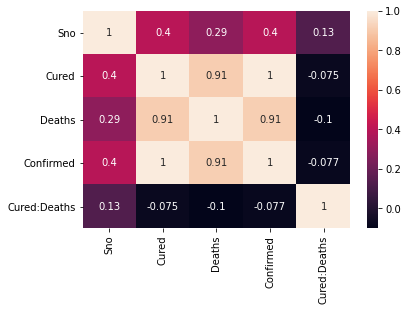

In [ ]:
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True)

In [ ]:
fig = px.line(data_frame = df, x = 'State/UnionTerritory', y="Confirmed")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

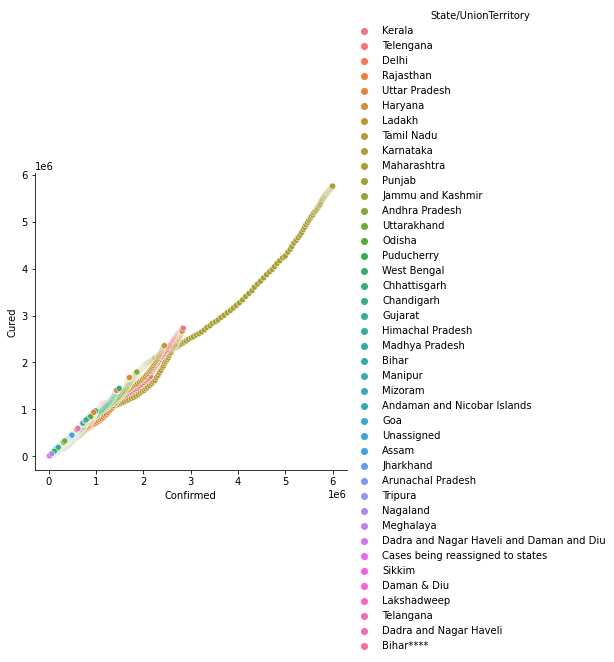

In [ ]:
sns.relplot(x='Confirmed',y='Cured',hue = 'State/UnionTerritory', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



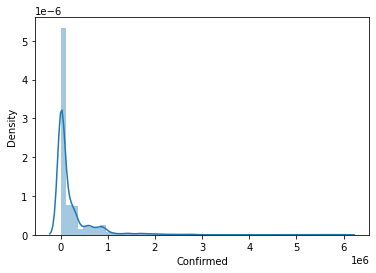

In [ ]:
sns.distplot(df['Confirmed'])

Graph showing the rate of Cured cases

In [ ]:
fig = px.line(data_frame=df, y='Cured', color='State/UnionTerritory')
fig.show()

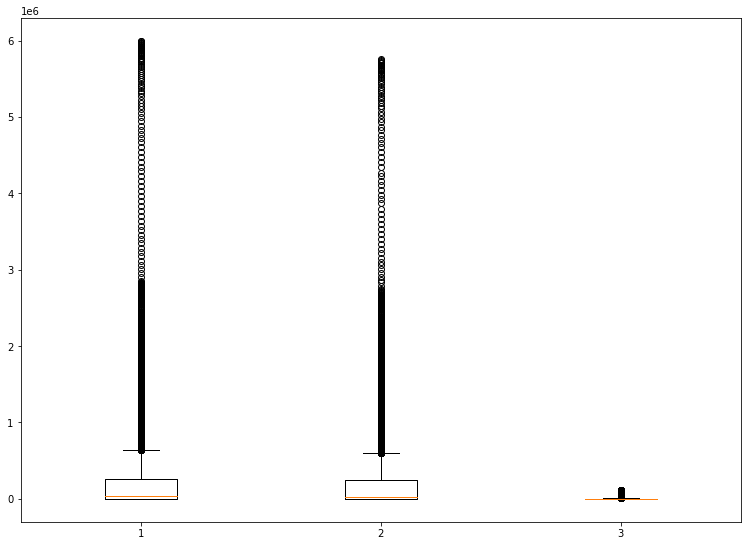

In [ ]:
data_1 = df["Confirmed"].to_numpy(np.int)
data_2 = df["Cured"].to_numpy(np.int)
data_3 = df["Deaths"].to_numpy(np.int)
data = [data_1, data_2, data_3]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

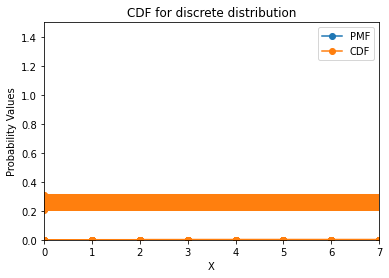

In [ ]:
x=data_1
y=data_2
pdf=y/np.sum(y)
cdf=np.cumsum(pdf)

plt.plot(x,pdf, marker="o",label="PMF")
plt.plot(x,cdf,marker="o",label="CDF")
plt.xlim(0,7)
plt.ylim(0,1.5)
plt.xlabel("X")
plt.ylabel("Probability Values")
plt.title("CDF for discrete distribution")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-pack

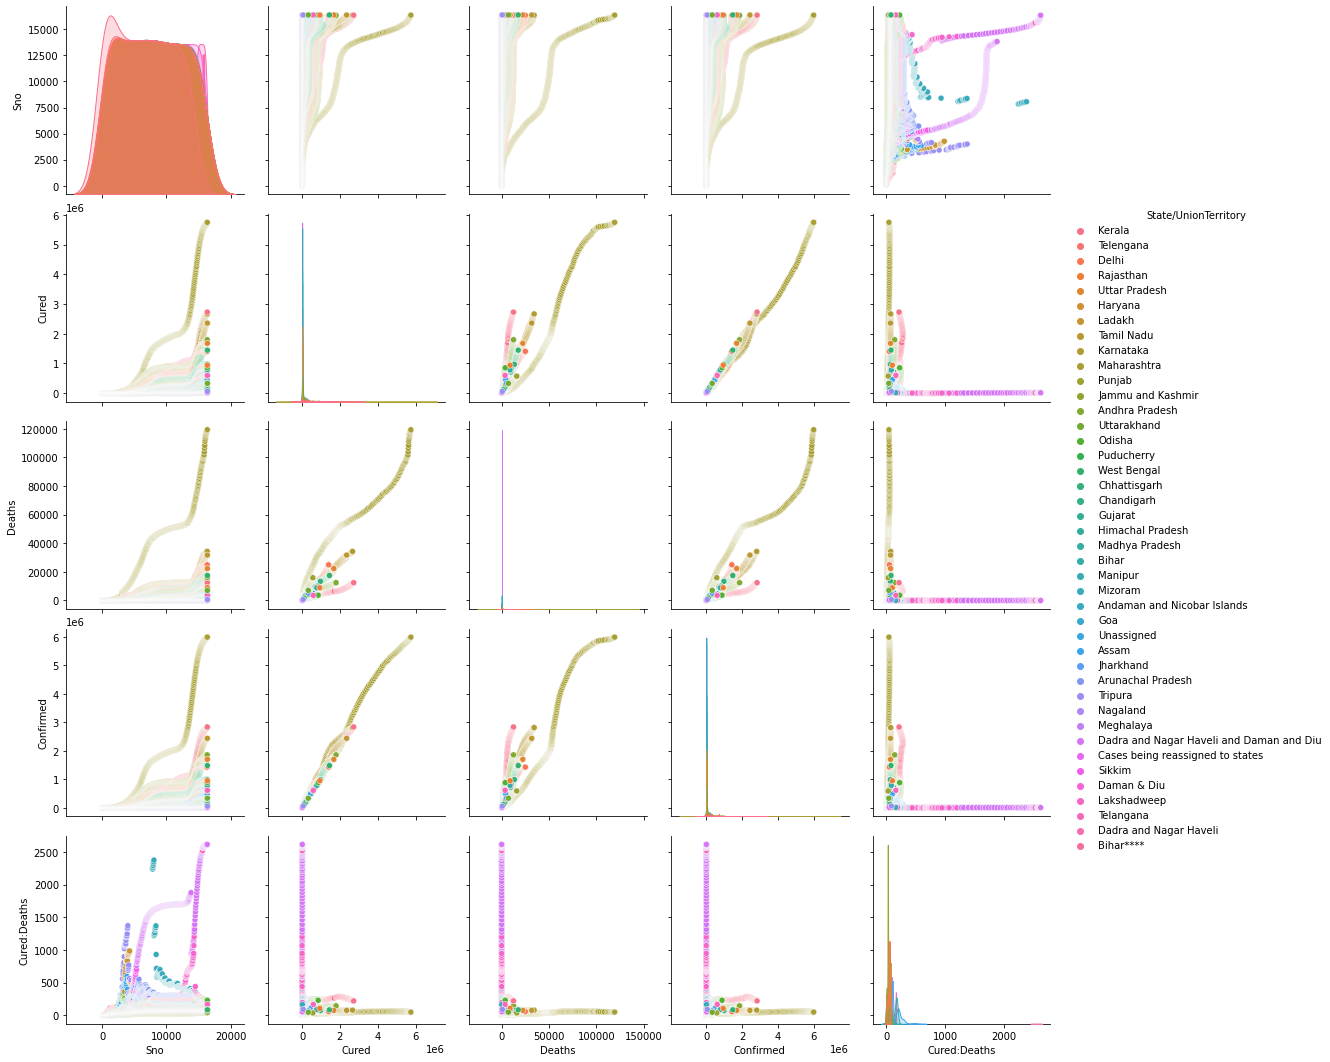

In [ ]:
sns.pairplot(df,hue="State/UnionTerritory",size=3)
plt.show()

In [ ]:
df_Kerala=df.loc[df["State/UnionTerritory"]=="Kerala"]

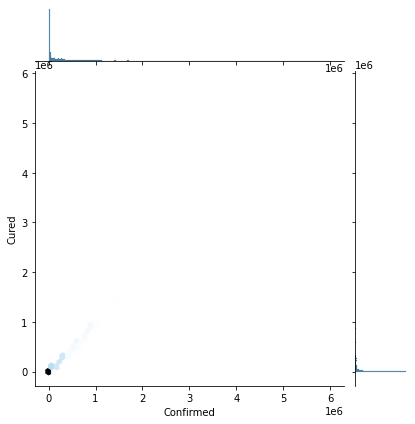

In [ ]:
sns.jointplot(x="Confirmed", y="Cured", data=df,kind='hex');
plt.show();

In [ ]:
top5Confirmed = pd.DataFrame(df.groupby('State/UnionTerritory')['Confirmed'].sum().nlargest(5).sort_values(ascending = False))
fig = px.density_contour(top5Confirmed, x = top5Confirmed.index, y = 'Confirmed', height = 500, width = 900, color = 'Confirmed',
             title = 'Top 5 States of Confirmed Cases')
fig.show()

In [ ]:
top5Cured = pd.DataFrame(df.groupby('State/UnionTerritory')['Cured'].sum().nlargest(5).sort_values(ascending = False))
fig = px.area(top5Cured, x = top5Confirmed.index, y = 'Cured', height = 500, width = 700, color = 'Cured',
             title = 'Top 5 States with Cured Cases',)
fig.show()

In [ ]:
top5Deaths = pd.DataFrame(df.groupby('State/UnionTerritory')['Deaths'].sum().nlargest(5).sort_values(ascending = False))
fig = px.bar(top5Deaths, x = top5Deaths.index, y = 'Deaths', height = 500, width = 500, color = 'Deaths',
             title = 'Top 5 Deaths States')
fig.show()

Trimmed mean of Cured data

In [ ]:
print("Trimmed mean of Cured cases: ",stats.trim_mean(df['Cured'], 0.1))

#trim = 0.1 drops 10% from each end(outliers)

Trimmed mean of Cured cases:  109905.7128032962


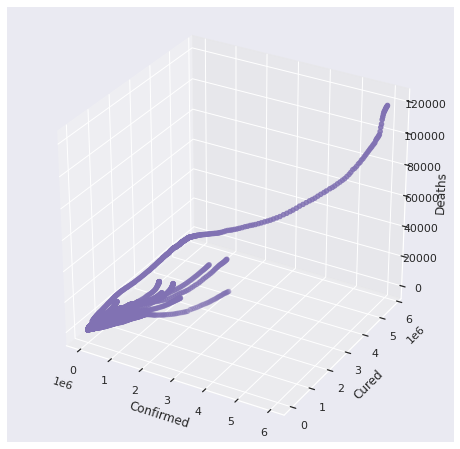

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# adjust size of plot
sns.set(rc={'figure.figsize': (8, 8)})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(data_1,data_2,data_3, c='m',depthshade=True)
 
# assign labels
ax.set_xlabel('Confirmed'), ax.set_ylabel('Cured'), ax.set_zlabel('Deaths')
 
# display illustration
plt.show()